In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
Hotel = pd.read_csv("hotel_bookings.csv")
Hotel["is_canceled"].replace([0], 'não', inplace = True )
Hotel["is_canceled"].replace([1], 'sim', inplace = True)

## Analisando qual hotel possui maior taxa de cancelamento

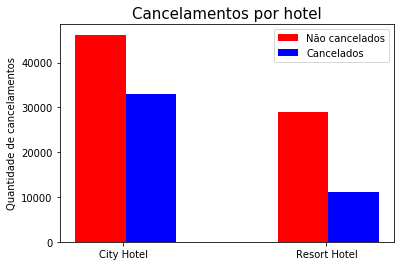

In [3]:
Hotel_cancelado = Hotel.groupby("hotel")["is_canceled"].value_counts()

x1 = np.arange(len(Hotel.groupby("hotel").count()))
x2 = [x + 0.25 for x in x1 ]

hotel_cancelado_não = Hotel_cancelado.drop(index = 'sim', level = 1)
hotel_cancelado_sim = Hotel_cancelado.drop(index = 'não', level = 1)

hotel = ["City Hotel", "Resort Hotel"]

plt.bar(x1, hotel_cancelado_não, width = 0.25, label = "Não cancelados", color = 'r')
plt.bar(x2, hotel_cancelado_sim, width = 0.25, label = "Cancelados", color = 'b')

plt.xticks([x - 0.135 for x in x2 ], hotel)

plt.title("Cancelamentos por hotel", fontsize = 15)
plt.ylabel("Quantidade de cancelamentos")

plt.legend(loc = 'best')

plt.show()

## -----------------------------------------------------------------------------------------

## Analisando qual hotel possui mais visitas ao longo dos anos


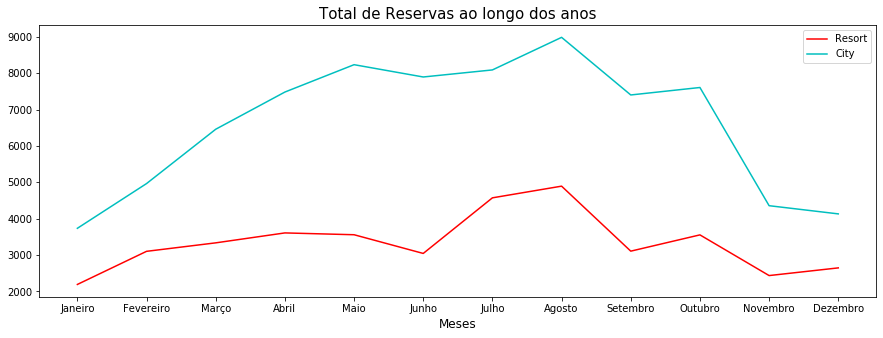

In [4]:
hotel_meses = Hotel.groupby("hotel")["arrival_date_month"].value_counts()
hotel_tempo = pd.DataFrame(hotel_meses)

#Criando série que ajudará a ordenar valores do dataframe de tempo
mês = [8,5,7,6,10,4,9,3,2,11,12,1,8,7,4,5,10,3,9,2,6,12,11,1]

x = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto",
    "Setembro", "Outubro", "Novembro", "Dezembro"]

figure = plt.subplots(figsize = (15,5))

hotel_tempo["mês"] = mês
hotel_tempo_Resort = hotel_tempo.drop(index = "City Hotel", level = 0)
hotel_tempo_Resort = hotel_tempo_Resort.sort_values(by = ["mês"], ascending = True)

hotel_tempo_City = hotel_tempo.drop(index = "Resort Hotel", level = 0)
hotel_tempo_City = hotel_tempo_City.sort_values(by = ["mês"], ascending = True)

plt.plot(x, hotel_tempo_Resort["arrival_date_month"], label = "Resort", color = 'r')
plt.plot(x, hotel_tempo_City["arrival_date_month"], label = "City", color = 'c')

plt.xlabel("Meses", fontsize = 12)
plt.title("Total de Reservas ao longo dos anos", fontsize = 15)

plt.legend(fontsize = 10)

plt.show()




## O hotel que mais teve visitas foi o City Hotel. Importante notar que eles apresentam alguns pontos de aumento e queda coincidentes. Outro ponto válido é que o City Hotel apresenta maior derivada(crescimento) no início do ano enquanto o Resort Hotel apresenta esse crescimento a partir de junho que é verão no Hemisfério Norte. Esse comportamento ocorre provavelmente porque o City Hotel deve ser um hotel na cidade enquanto o Resort Hotel é algo mais pra verão. 

## -----------------------------------------------------------------------------------

## Quebrando a análise acima por ano

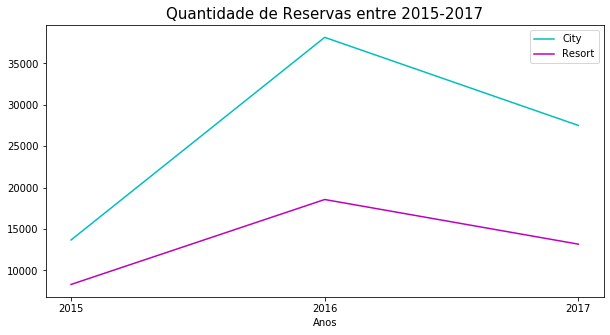

In [5]:
hotel_tempo_ano = Hotel.groupby("hotel")["arrival_date_year"].value_counts()

#Convertendo em DataFrame

hotel_tempo_ano = pd.DataFrame(hotel_tempo_ano)


#Criando uma lista para ordenar os valores abaixo
ordem = [2,3,1,2,3,1]
#Adicionando a ordem ao DataFrame
hotel_tempo_ano['ordem'] = ordem
#Ordenando
hotel_tempo_ano = hotel_tempo_ano.sort_values(by = ["ordem"], ascending = True)
#Separando o dataset por hotel
hotel_ano_City = hotel_tempo_ano.drop(index = "Resort Hotel", level = 0)
hotel_ano_Resort = hotel_tempo_ano.drop(index = "City Hotel", level = 0)

figure = plt.subplots(figsize = (10,5))

anos = [2015,2016,2017]

plt.plot(anos, hotel_ano_City["arrival_date_year"], label = "City", color = 'c')
plt.plot(anos, hotel_ano_Resort["arrival_date_year"], label = "Resort", color = "m")

plt.xlabel("Anos")
plt.title("Quantidade de Reservas entre 2015-2017", fontsize = 15)
plt.xticks(anos)

plt.legend(loc = 'best')


plt.show()

## Essa análise não faz muito sentido porque o ano de 2015 começa em julho e o de 2017 termina em agosto

## ----------------------------------------------------------------------------------------

## Analisando qual país tem mais pessoas se hospedando


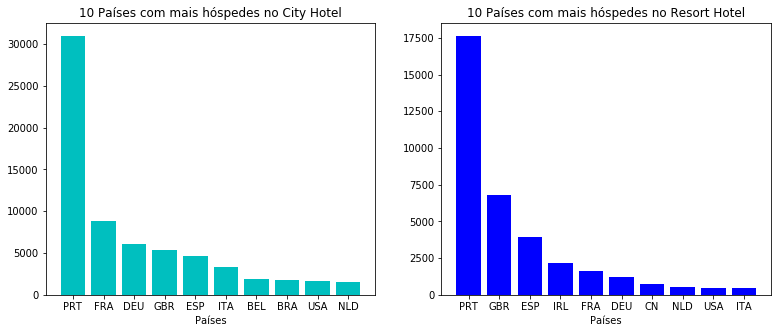

In [6]:
hotel_hóspedes = Hotel.groupby(['hotel'])["country"].value_counts()
df_hotel_hóspedes = pd.DataFrame(hotel_hóspedes)

df_hotel_hóspedes_City = df_hotel_hóspedes.drop(index = "Resort Hotel", level = 0)
df_hotel_hóspedes_City_10 = df_hotel_hóspedes_City.head(10) 

df_hotel_hóspedes_Resort = df_hotel_hóspedes.drop(index = "City Hotel", level = 0)
df_hotel_hóspedes_Resort_10 = df_hotel_hóspedes_Resort.head(10)

figure, (ax1, ax2) =  plt.subplots(1,2, figsize = (13,5))

x_City = ["PRT", 'FRA', 'DEU', 'GBR', 'ESP', 'ITA', 'BEL', 'BRA', 'USA', 'NLD']
x_Resort = ["PRT","GBR","ESP","IRL", "FRA", "DEU", "CN", "NLD", "USA", "ITA"]

ax1.bar(x_City, df_hotel_hóspedes_City_10["country"], color = 'c')
ax2.bar(x_Resort, df_hotel_hóspedes_Resort_10["country"], color = 'b')

ax1.set(Title = "10 Países com mais hóspedes no City Hotel", xlabel = "Países")
ax2.set(Title = "10 Países com mais hóspedes no Resort Hotel", xlabel = "Países")


plt.show()


## Vemos uma predominância de clientes vindo de Portugal, indicando provavelmente que os hotéis são desse país

## --------------------------------------------------------------------------------


## Tentando descobrir se no Resort Hotel tem maior incidência de crianças + bebês

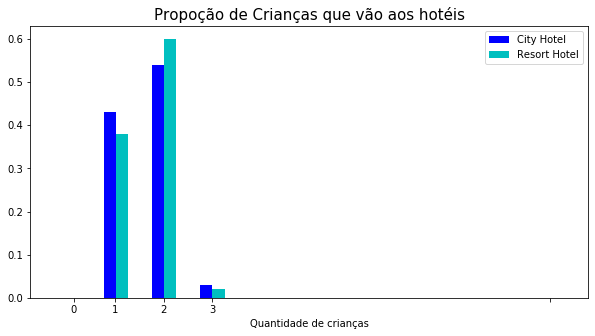

In [7]:
#Somando as crianças
crianças = Hotel["children"] + Hotel["babies"]
df_crianças = pd.DataFrame(crianças)

#Adicionando ao df original
Hotel["Crianças"] = df_crianças

#Criando lista com a quantidade de crianças para cada hotel pra multiplicar depois
quantidade_crianças_City = [0,1,2,3,9,10]
quantidade_crianças_Resort = [0,1,2,3,10]

#Somando o total de crianças por quantidade
hotel_pequenos_soma = Hotel.groupby(["hotel"])["Crianças"].sum()
df_hotel_pequenos_soma = pd.DataFrame(hotel_pequenos_soma)

#Contando a quantidade de crianãs que tem no hotel
hotel_pequenos = Hotel.groupby(["hotel"])["Crianças"].value_counts()
df_hotel_pequenos = pd.DataFrame(hotel_pequenos)

#Separando por tipo de hotel, depois multiplicando o total de crianças agrupadas pela quantidade e dividindo pelo total
df_hotel_pequenos_City = df_hotel_pequenos.drop(index = "Resort Hotel", level = 0)
df_hotel_pequenos_City["quantidade_crianças_City"] = quantidade_crianças_City
df_hotel_pequenos_City["Total de Crianças"] = df_hotel_pequenos_City["Crianças"] * df_hotel_pequenos_City["quantidade_crianças_City"]
df_hotel_pequenos_City["Proporção"] = df_hotel_pequenos_City["Total de Crianças"].div(7640).round(2)    

#Separando por tipo de hotel, depois multiplicando o total de crianças agrupadas pela quantidade e dividindo pelo total
df_hotel_pequenos_Resort = df_hotel_pequenos.drop(index = "City Hotel", level = 0)
df_hotel_pequenos_Resort["quantidade_crianças_Resort"] = quantidade_crianças_Resort
df_hotel_pequenos_Resort["Total de Crianças"] = df_hotel_pequenos_Resort["Crianças"] * df_hotel_pequenos_Resort["quantidade_crianças_Resort"]
df_hotel_pequenos_Resort["Proporção"] = df_hotel_pequenos_Resort["Total de Crianças"].div(5712).round(2)  


figure = plt.subplots(figsize = (10,5))

x_quantidade_crianças_Resort = [0.25,1.25,2.25,3.25,10.25]

plt.bar(quantidade_crianças_City,df_hotel_pequenos_City["Proporção"], color = 'b', width = 0.25, label = "City Hotel" )
plt.bar(x_quantidade_crianças_Resort, df_hotel_pequenos_Resort["Proporção"], color = 'c', width = 0.25, label = "Resort Hotel")

x_ticks = [0.25, 1.115, 2.115, 3.115, 10.115]

plt.title("Propoção de Crianças que vão aos hotéis", fontsize = 15)
plt.xlabel("Quantidade de crianças")
plt.xticks(x_ticks,[0,1,2,3])
plt.legend(loc = 'best')
plt.show()

## -----------------------------------------------------------------------------

## Vendo como é a taxa de clientes recorrentes

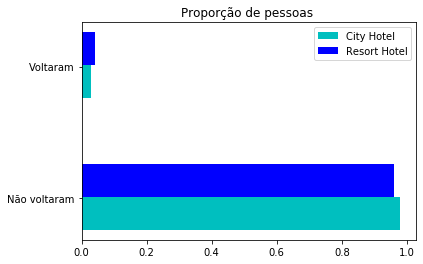

In [8]:
hotel_recorrente = Hotel.groupby(["hotel"])["is_repeated_guest"].value_counts()
df_hotel_recorrente = pd.DataFrame(hotel_recorrente)

df_hotel_recorrente.rename(index = {0: 'não', 1: 'sim'}, inplace = True)

df_hotel_recorrente_City = df_hotel_recorrente.drop(index = "Resort Hotel", level = 0)
df_hotel_recorrente_City["Recorrente"] = df_hotel_recorrente_City.div(79230).round(2)

df_hotel_recorrente_Resort = df_hotel_recorrente.drop(index = "City Hotel", level = 0 )
df_hotel_recorrente_Resort["Recorrente"] = df_hotel_recorrente_Resort.div(40060).round(2)

Hoteis = ["Não voltaram", 'Voltaram']
x1 = np.arange(len(df_hotel_recorrente_City))
x2 = [x + 0.25 for x in x1]

plt.barh(x1,df_hotel_recorrente_City["Recorrente"], height = 0.25 , color = 'c', label = "City Hotel" )
plt.barh(x2,df_hotel_recorrente_Resort["Recorrente"], height= 0.25 , color = 'b', label = 'Resort Hotel')

plt.yticks([x - 0.135 for x in x2],Hoteis )

plt.title("Proporção de pessoas ")
plt.legend()
plt.show()

## ---------------------------------------------------------------------------------

## Procurando entender se o Booking Changes afeta o Cancelamento

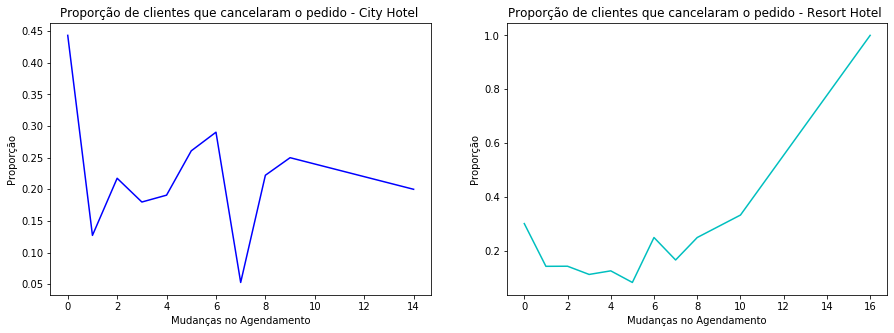

In [9]:


hotel_booking = Hotel.groupby(["hotel", "booking_changes"])["reservation_status"].value_counts()
df_hotel_booking = pd.DataFrame(hotel_booking)

## Retirando a linha do resort Hotel, depois deixando apenas os cancelados
df_hotel_booking_City = df_hotel_booking.drop(index = "Resort Hotel", level = 0)
df_hotel_booking_City_Canceled = df_hotel_booking_City.drop(index = ["Check-Out","No-Show"], level = 2)

## Calculando o total de pedidos realizados por booking_changes e juntando essa soma ao Dataframe que contém os dados cancelados.
df_hotel_booking_City_Soma = df_hotel_booking_City.groupby(["booking_changes"]).sum()
df_hotel_booking_City_Canceled = df_hotel_booking_City_Canceled.join(df_hotel_booking_City_Soma["reservation_status"], on = "booking_changes",
                                    lsuffix = '_canceled')
df_hotel_booking_City_Canceled["Proporção"] = df_hotel_booking_City_Canceled["reservation_status_canceled"]/df_hotel_booking_City_Canceled["reservation_status"]
    
##Agora fazendo o mesmo para o outro hotel
## Retirando a linha do City Hotel, depois deixando apenas os cancelados
df_hotel_booking_Resort = df_hotel_booking.drop(index = "City Hotel", level = 0)
df_hotel_booking_Resort_Canceled = df_hotel_booking_Resort.drop(index = ["Check-Out", "No-Show"], level = 2)

## Calculando o total de pedidos realizados por booking_changes e juntando essa soma ao DataFrame que contém os dados cancelados
df_hotel_booking_Resort_Soma = df_hotel_booking_Resort.groupby(["booking_changes"]).sum()
df_hotel_booking_Resort_Canceled = df_hotel_booking_Resort_Canceled.join(df_hotel_booking_Resort_Soma["reservation_status"], on =  "booking_changes",
                                    lsuffix = '_canceled')
df_hotel_booking_Resort_Canceled["Proporção"] = df_hotel_booking_Resort_Canceled["reservation_status_canceled"]/df_hotel_booking_Resort_Canceled["reservation_status"]

df_hotel_booking_City_Canceled.rename(columns={"reservation_status":"reservation_total"}, inplace = True)
df_hotel_booking_Resort_Canceled.rename(columns={"reservation_status":"reservation_total"}, inplace = True)

df_hotel_booking_City_Canceled.reset_index(inplace = True)
df_hotel_booking_Resort_Canceled.reset_index(inplace = True)

figure, (ax1,ax2) = plt.subplots(1,2, figsize= (15,5))

ax1.plot(df_hotel_booking_City_Canceled["booking_changes"], df_hotel_booking_City_Canceled["Proporção"], color = 'b')
ax2.plot(df_hotel_booking_Resort_Canceled["booking_changes"],df_hotel_booking_Resort_Canceled["Proporção"], color = 'c')

ax1.set(title = "Proporção de clientes que cancelaram o pedido - City Hotel ", xlabel = "Mudanças no Agendamento", ylabel = "Proporção")
ax2.set(title = "Proporção de clientes que cancelaram o pedido - Resort Hotel ", xlabel = "Mudanças no Agendamento", ylabel = "Proporção")

plt.show()


## Podemos ver que à medida em que mudamos nosso agendamento a chance de cancelarmos o pedido é maior

## ------------------------------------------------------------------------------

## Vendo qual tipo de quarto é mais pedido em cada hotel


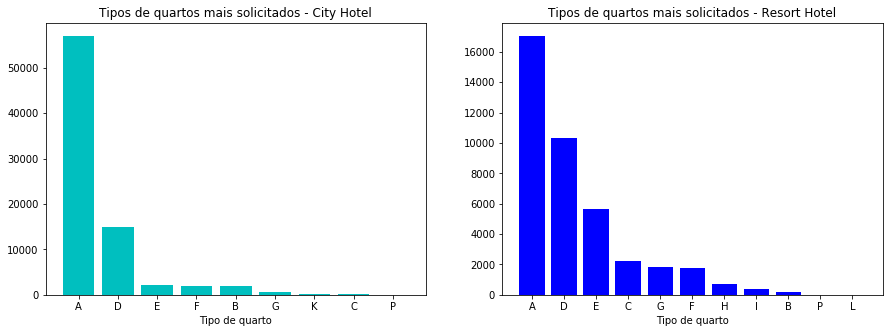

In [10]:
hotel_room = Hotel.groupby(["hotel"])["assigned_room_type"].value_counts()
df_hotel_room = pd.DataFrame(hotel_room)

df_hotel_room_City = df_hotel_room.drop(index = "Resort Hotel")
df_hotel_room_City.rename(columns = {"assigned_room_type":"Contagem de quartos"}, inplace = True)
df_hotel_room_City = df_hotel_room_City.reset_index()

df_hotel_room_Resort = df_hotel_room.drop(index = "City Hotel")
df_hotel_room_Resort.rename(columns = {"assigned_room_type":"Contagem de quartos"}, inplace = True)
df_hotel_room_Resort = df_hotel_room_Resort.reset_index() 

figure, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.bar(df_hotel_room_City["assigned_room_type"], df_hotel_room_City["Contagem de quartos"], color = 'c')
ax2.bar(df_hotel_room_Resort["assigned_room_type"], df_hotel_room_Resort["Contagem de quartos"], color = 'b')

ax1.set(title = "Tipos de quartos mais solicitados - City Hotel", xlabel = "Tipo de quarto")
ax2.set(title = "Tipos de quartos mais solicitados - Resort Hotel", xlabel = "Tipo de quarto")

plt.show()

## ------------------------------------------------------------------------------------------


## Vendo se quanto mais o cliente cancelou outras reservas, mais propício ele é a cancelar a nova


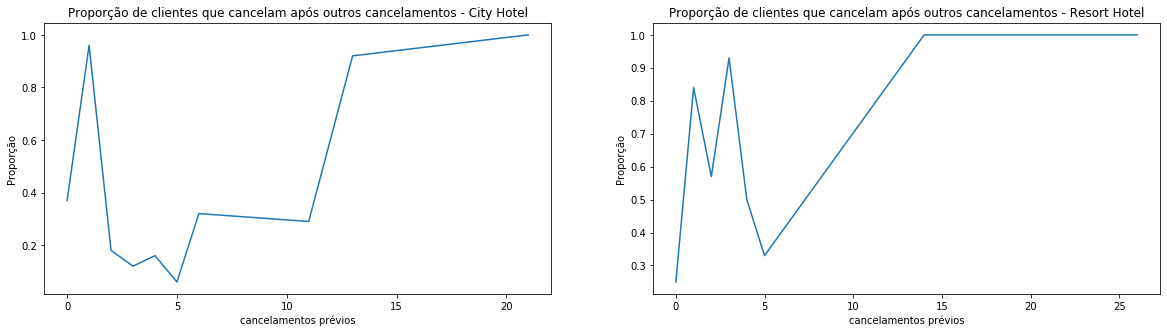

In [11]:
hotel_changes = Hotel.groupby(["hotel","previous_cancellations"])["reservation_status"].value_counts()
df_hotel_changes = pd.DataFrame(hotel_changes)

df_hotel_changes_City = df_hotel_changes.drop(index = "Resort Hotel")
df_hotel_changes_City.rename(columns = {"reservation_status": "Quantidade de status da reserva"}, inplace = True)

df_hotel_changes_City_Canceled = df_hotel_changes_City.drop(index = ["Check-Out", "No-Show"], level = 2)
df_hotel_changes_City_Canceled.reset_index(inplace = True)

df_hotel_changes_City_soma = df_hotel_changes.drop(index = "Resort Hotel")
df_hotel_changes_City_soma = df_hotel_changes_City.groupby(["previous_cancellations"]).sum()

df_hotel_changes_City_Canceled = df_hotel_changes_City_Canceled.join(df_hotel_changes_City_soma, 
                                                                    on = "previous_cancellations", lsuffix = '_cancelados')
df_hotel_changes_City_Canceled["Proporção"] = (df_hotel_changes_City_Canceled["Quantidade de status da reserva_cancelados"]/df_hotel_changes_City_Canceled["Quantidade de status da reserva"]).round(2) 


df_hotel_changes_Resort = df_hotel_changes.drop(index = "City Hotel")
df_hotel_changes_Resort.rename(columns = {"reservation_status":"Quantidade de status da reserva"}, inplace = True)
                               
df_hotel_changes_Resort_Canceled = df_hotel_changes_Resort.drop(index = ['Check-Out', 'No-Show'], level = 2)
df_hotel_changes_Resort_Canceled.reset_index(inplace = True)

df_hotel_changes_Resort_soma = df_hotel_changes.drop(index = "City Hotel")
df_hotel_changes_Resort_soma = df_hotel_changes_Resort.groupby(["previous_cancellations"]).sum()

df_hotel_changes_Resort_Canceled = df_hotel_changes_Resort_Canceled.join(df_hotel_changes_Resort_soma, 
                                                                    on = "previous_cancellations", lsuffix = '_cancelados')
df_hotel_changes_Resort_Canceled["Proporção"] = (df_hotel_changes_Resort_Canceled["Quantidade de status da reserva_cancelados"]/df_hotel_changes_Resort_Canceled["Quantidade de status da reserva"]).round(2) 


figure, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.plot(df_hotel_changes_City_Canceled["previous_cancellations"],df_hotel_changes_City_Canceled["Proporção"])
ax2.plot(df_hotel_changes_Resort_Canceled["previous_cancellations"],df_hotel_changes_Resort_Canceled["Proporção"])

ax1.set(title = "Proporção de clientes que cancelam após outros cancelamentos - City Hotel", xlabel = "cancelamentos prévios", ylabel = "Proporção")
ax2.set(title = "Proporção de clientes que cancelam após outros cancelamentos - Resort Hotel", xlabel = "cancelamentos prévios", ylabel = "Proporção")

plt.show()




## Vemos que para City Hotel o cliente é mais propício a dar Check-Out após cancelar uma quantidade razoável de vezes.
## Enquanto que para o Resort Hotel o cliente é mais propício a Cancelar após uma quantidade razoável de vezes

## ----------------------------------------------------------------------------------